# 03. Visualising Spatial Data

- R은 2가지의 plotting systems 있음.
    - 1) 전통적인 plotting system
        - 전형적인 점진적인 구축방식 : 여러 가지 함수들이 호출되면서 graphic 요소가 추가됨
    - 2) Trellis Graphics system (lattice package)
        - ‘grid’ graphics model
        - conditioning plots이 제공되어 고차원 데이터를 plotting할 수 있음
        - 이런 특징은 spatial time series의 경우에 다양한 map을 비교할때 유용함.


- sp 패키지의 plotting 방법
    - plot method
        - R plotting system (plot, image, lines, points, etc.)
    - spplot method
        - Trellis system (notably xyplot or levelplot from the lattice package)

## 3.1 The Traditional Plot System

### 3.1.1 Plotting Points, Lines, Polygons, and Grids

In [3]:
library(sp)

[1] "SpatialPointsDataFrame"
attr(,"package")
[1] "sp"

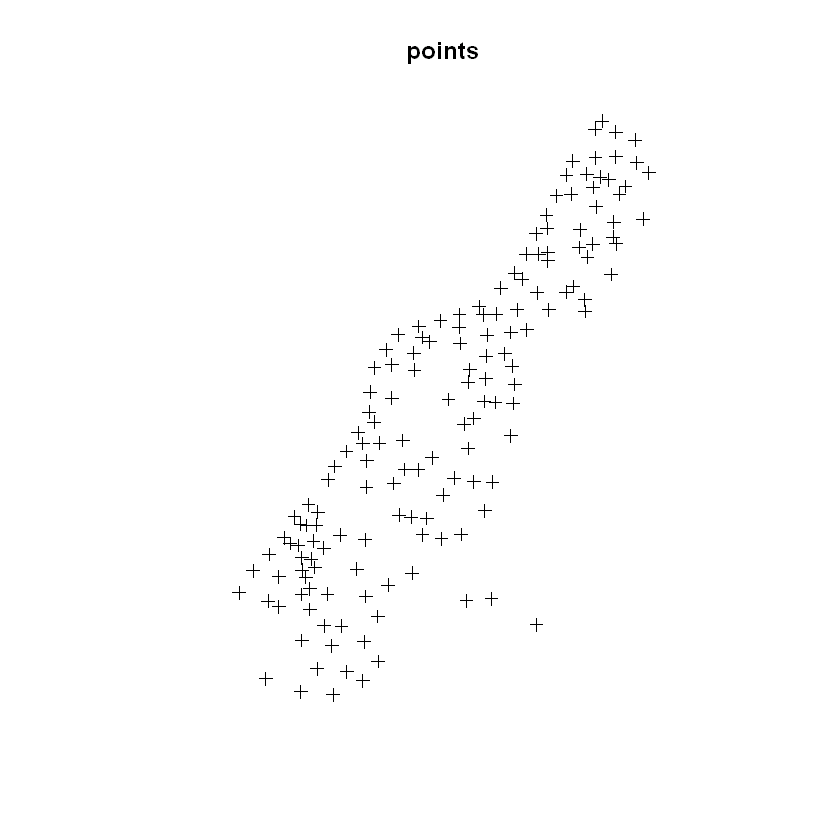

In [4]:
data(meuse)
coordinates(meuse) <- c("x", "y")
class(meuse)
plot(meuse)
title("points")

m.sl <- SpatialLines(list(Lines(list(Line(cc))))) 책의 코드 

[1] "SpatialLines"
attr(,"package")
[1] "sp"

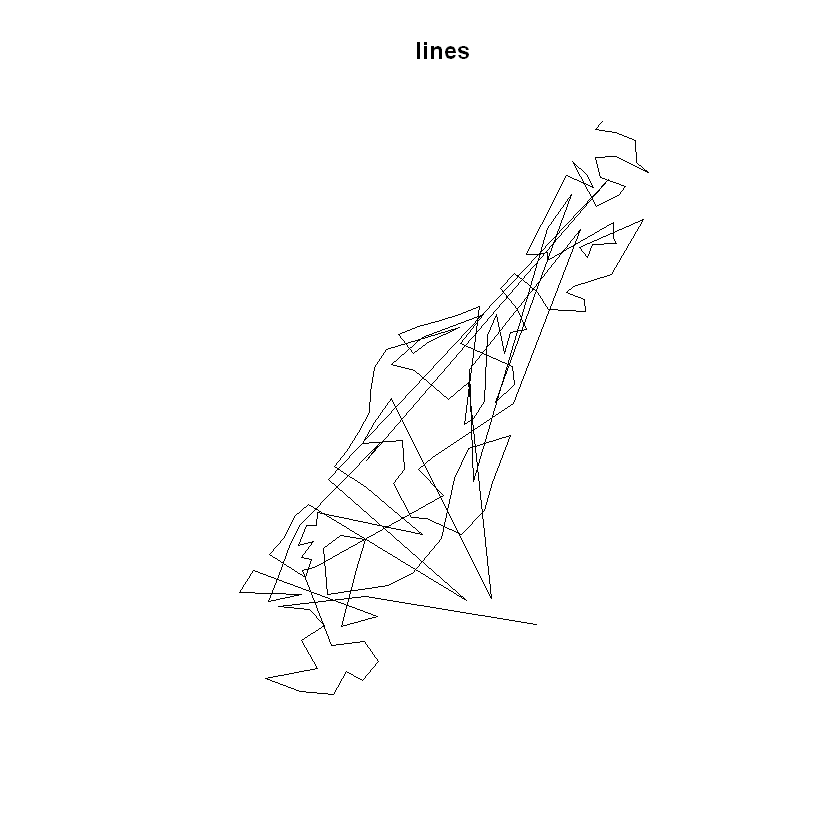

In [5]:
cc <- coordinates(meuse)
m.sl <- SpatialLines(list(Lines(list(Line(cc)), "line1")))
class( m.sl )
plot(m.sl)
title("lines")

[1] "SpatialPolygons"
attr(,"package")
[1] "sp"

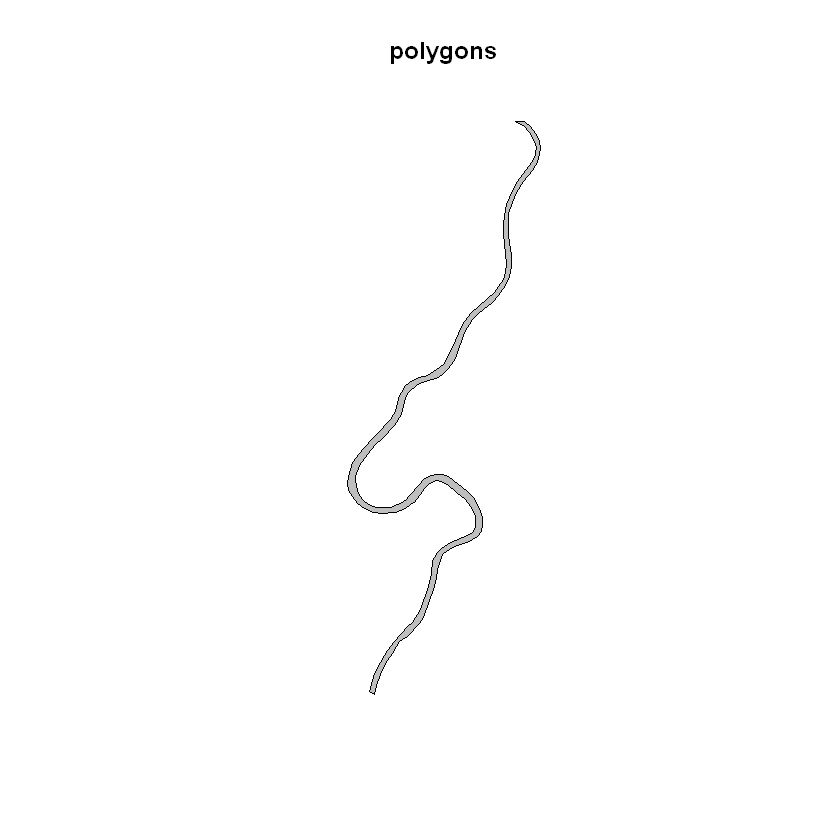

In [6]:
data(meuse.riv)
meuse.lst <- list(Polygons(list(Polygon(meuse.riv)), "meuse.riv"))
meuse.sr <- SpatialPolygons(meuse.lst)
class(meuse.sr)
plot(meuse.sr, col = "grey")
title("polygons")

[1] "SpatialPixels"
attr(,"package")
[1] "sp"

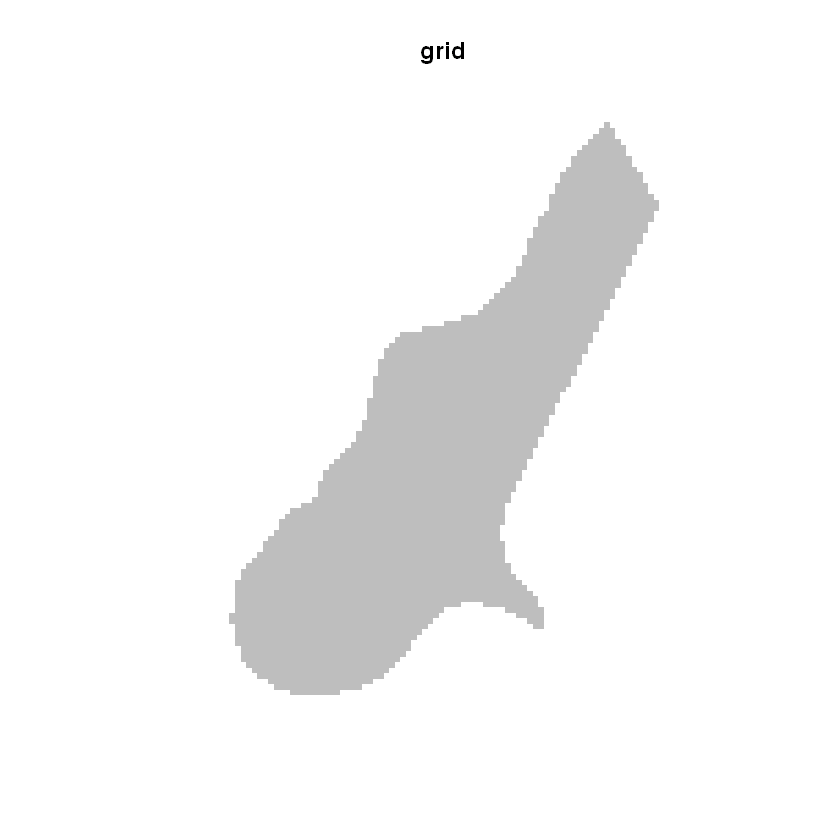

In [7]:
data(meuse.grid)
coordinates(meuse.grid) <- c("x", "y")
meuse.grid <- as(meuse.grid, "SpatialPixels")
class( meuse.grid )
image(meuse.grid, col = "grey")
title("grid")

map은 여러가지 요소를 결합할때 더욱 유익함.

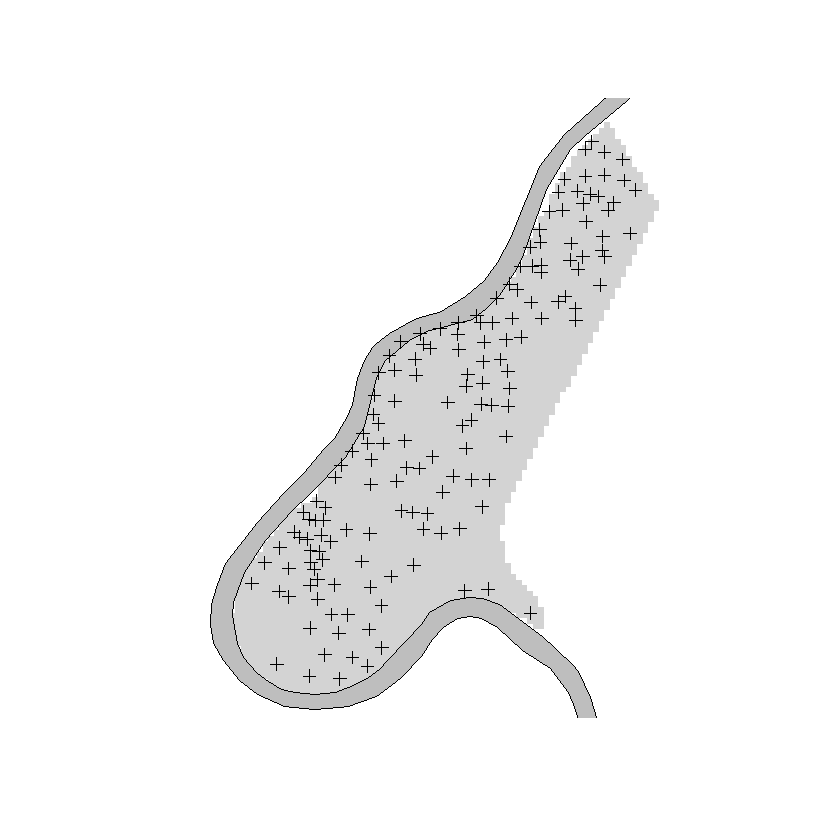

In [8]:
image(meuse.grid, col = "lightgrey")
plot(meuse.sr, col = "grey", add = TRUE)
plot(meuse, add = TRUE)

### 3.1.2 Axes and Layout Elements

- plotting할때 axis(좌표,축)를 보여주는 여부는 axis 인자를 사용하고 axis()함수를 이용해서 추가할 수 있음.

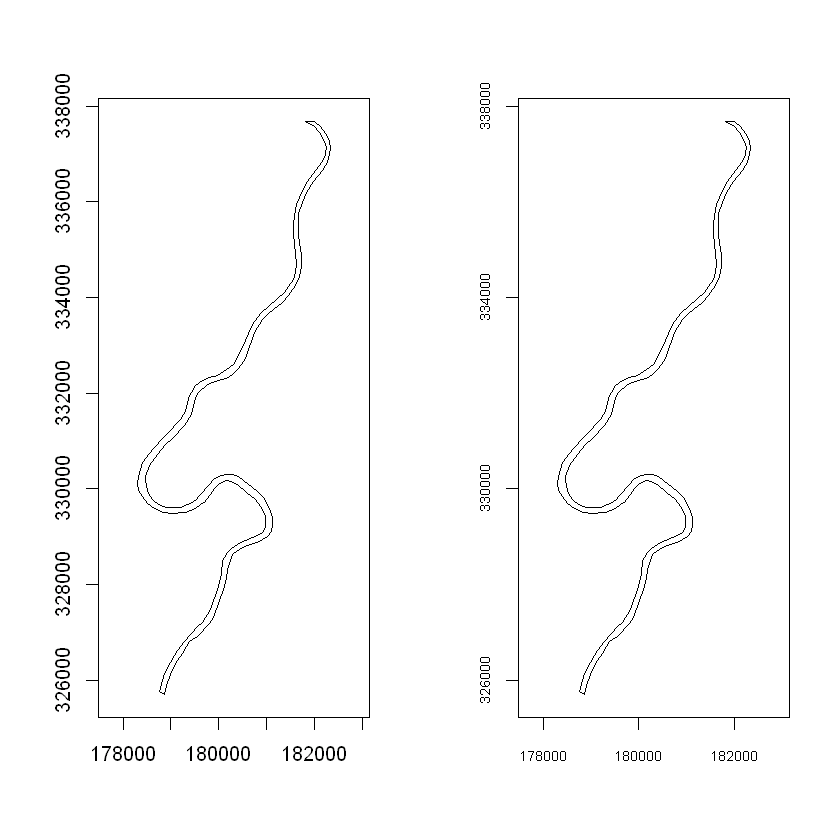

In [9]:
layout(matrix(c(1,2),1,2))
plot(meuse.sr, axes = TRUE)
plot(meuse.sr, axes = FALSE)
axis(1, at = c(178000 + 0:2 * 2000), cex.axis = .7)
axis(2, at = c(326000 + 0:3 * 4000), cex.axis = .7)
box()

- par()함수를 이용해서 plotting 영역의 예약된 공간을 명시적으로 조절할 수 있음
- 예제는 margin을 조절함.
- par()함수를 이후 plot에도 영향을 주므로, 복원하는 코드가 필요함.

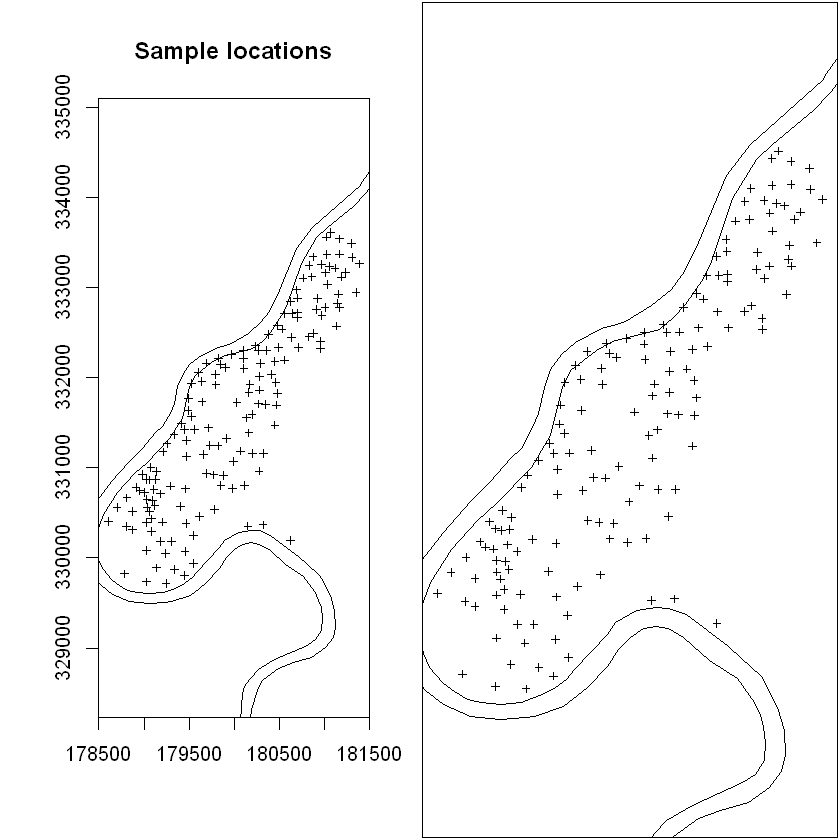

In [10]:
oldpar = par(no.readonly = TRUE)
layout(matrix(c(1, 2), 1, 2))
plot(meuse, axes = TRUE, cex = 0.6)
plot(meuse.sr, add = TRUE)
title("Sample locations")

par(mar = c(0, 0, 0, 0) + 0.1)
plot(meuse, axes = FALSE, cex = 0.6)
plot(meuse.sr, add = TRUE)
box()
par(oldpar)

- 방향이나 축척를 표시할 수 있음.
- 교재에는 locator()함수를 사용하라고 나오지만, 안 먹힘.

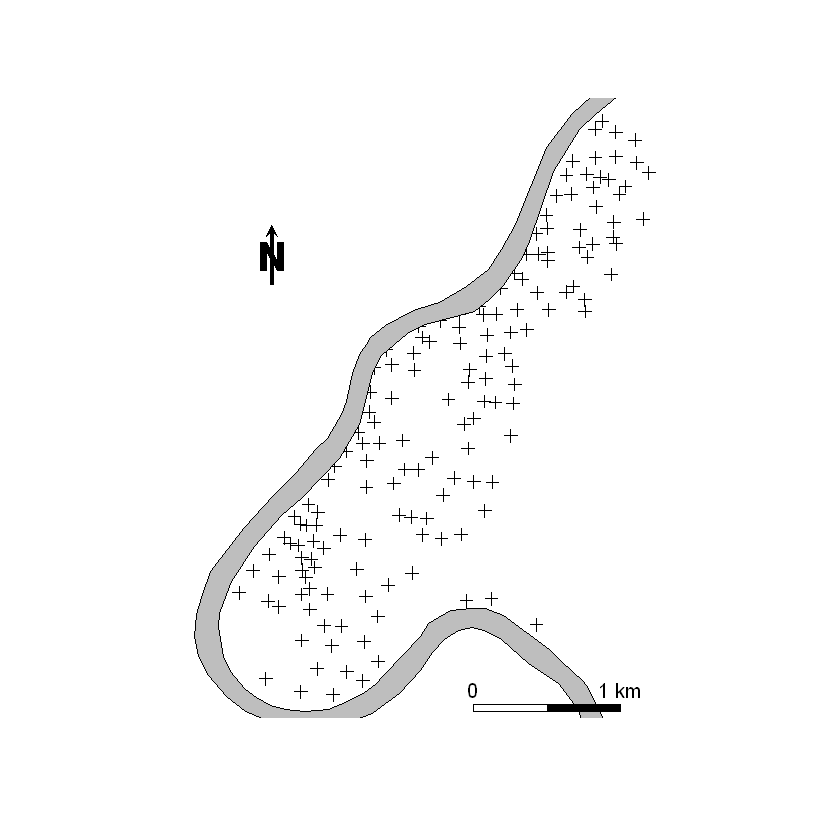

In [15]:
plot(meuse)
plot(meuse.sr, col = "grey", add = TRUE)
SpatialPolygonsRescale(layout.scale.bar(), offset = c(180200,329600),
    scale = 1000, fill=c("transparent","black"), plot.grid = FALSE)
text(x = c(180200,181200), y = rep(329750, 2), c("0", "1 km"))
SpatialPolygonsRescale(layout.north.arrow(), offset = c(178750,332500),
    scale = 400, plot.grid = FALSE)

### 3.1.3 Degrees in Axes Labels and Reference Grid

- grid 정보를 맵에 추가할때 gridlines()함수를 사용함.
- bounding box을 그리고, 기본 축 라벨 또는 지정한 라벨을 그림.
- latitude/longitude grids 또는 non-straight lines(비직선)도 가능함.
- 아래 예제는 그림 1.2임( 교재에서 코드 아래 그림3.7이 아님)

In [18]:
 install.packages("rgdal", repos="http://cran.nexr.com/"  ) 


  바이너리 버전을 이용할 수 있습니다 (그리고 설치되어질 것입니다)
  그러나 소스 버전은 추후에 제공될 것입니다:
      binary source
rgdal  1.1-8 1.1-10

package 'rgdal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpc7RxKo\downloaded_packages


In [ ]:
library(maptools)
library(maps)
library(rgdal)

Warning message:
In map2SpatialLines(wrld_p, proj4string = llCRS): map2SpatialLines: 670 zero-length Lines object(s) omitted

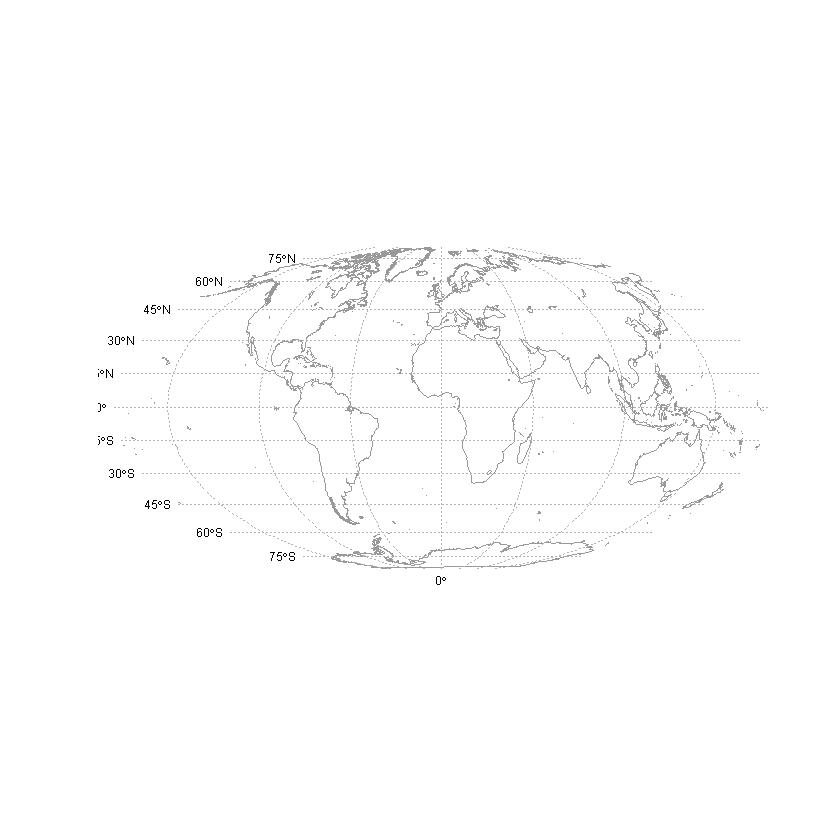

In [22]:
wrld <- map("world", 
            interior=FALSE, xlim=c(-179,179), 
            ylim=c(-89,89), plot=FALSE)
wrld_p <- pruneMap(wrld, xlim=c(-179,179))
llCRS <- CRS("+proj=longlat +ellps=WGS84")
wrld_sp <- map2SpatialLines(wrld_p, proj4string=llCRS)
prj_new <- CRS("+proj=moll +ellps=WGS84")


wrld_proj <- spTransform(wrld_sp, prj_new)
wrld_grd <- gridlines(wrld_sp, easts=c(-179,seq(-150,150,50), 179.5),              norths=seq(-75,75,15), ndiscr=100)
wrld_grd_proj <- spTransform(wrld_grd, prj_new)
at_sp <- gridat(wrld_sp, easts=0, norths=seq(-75,75,15), offset=0.3)
at_proj <- spTransform(at_sp, prj_new)
plot(wrld_proj, col="grey60")
plot(wrld_grd_proj, add=TRUE, lty=3, col="grey70")
text(coordinates(at_proj), pos=at_proj$pos, offset=at_proj$offset, 
     labels=parse(text=as.character(at_proj$labels)), cex=0.6)

### 3.1.4 Plot Size, Plotting Area, Map Scale, and Multiple Plots

- bbox(meuse) 그릴 맵의 가로/세로 비율에 맞게 그림 영역을 조절함

[1] 5.76 5.16

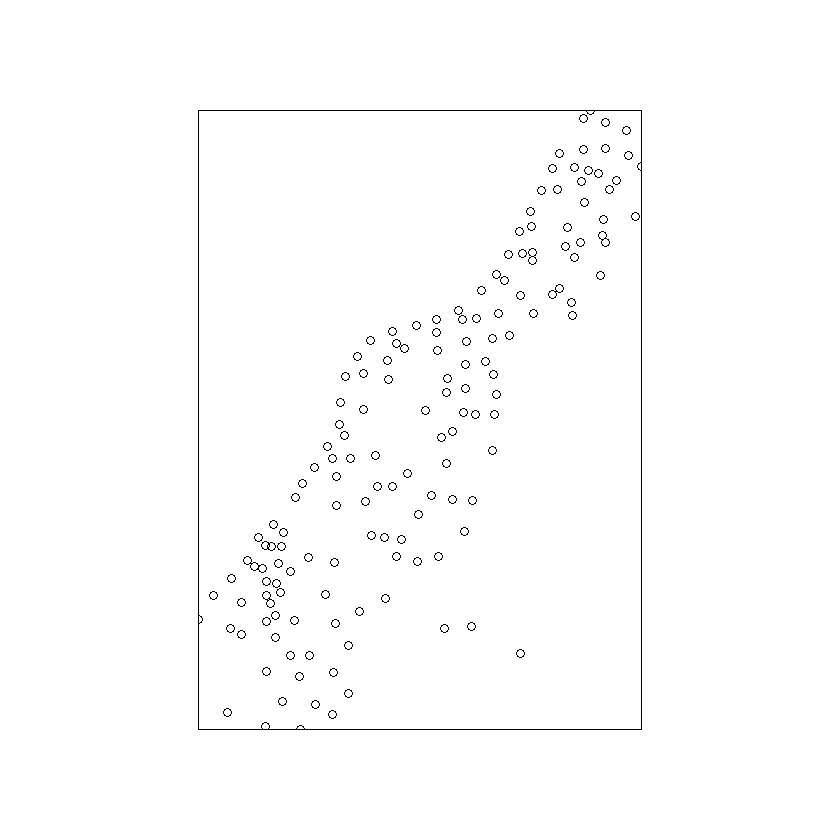

In [27]:
pin <- par("pin")
pin
dxy <- apply(bbox(meuse), 1, diff)
ratio <- dxy[1]/dxy[2]
par(pin = c(ratio * pin[2], pin[2]), xaxs = "i", yaxs = "i")
plot(meuse, pch = 1)
box()

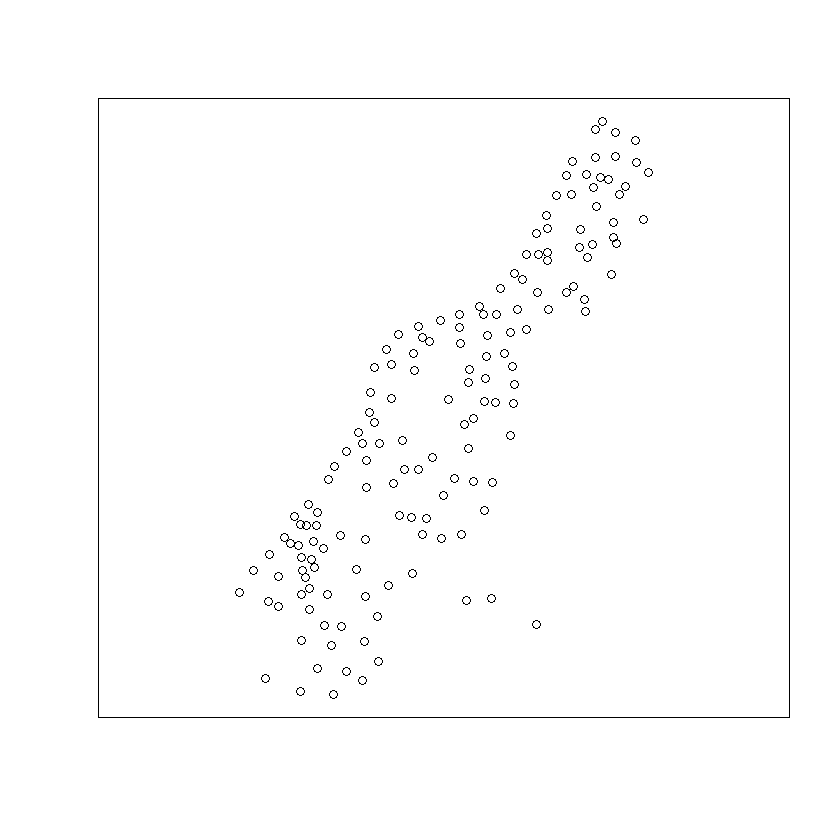

In [30]:
plot(meuse, pch = 1)
box()

### 3.1.5 Plotting Attributes and Map Legends

- 맵에 특징이나 속성을 나타내기 위해서 색, 선, 도형등을 사용함.
- 색, 크기, 심볼에 대한 설명을 legend()함수를 사용함.

In [34]:
install.packages("gstat", repos="http://cran.nexr.com/"  ) 

also installing the dependencies 'intervals', 'spacetime', 'FNN'



package 'intervals' successfully unpacked and MD5 sums checked
package 'spacetime' successfully unpacked and MD5 sums checked
package 'FNN' successfully unpacked and MD5 sums checked
package 'gstat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpc7RxKo\downloaded_packages


In [35]:
library(gstat)

[inverse distance weighted interpolation]


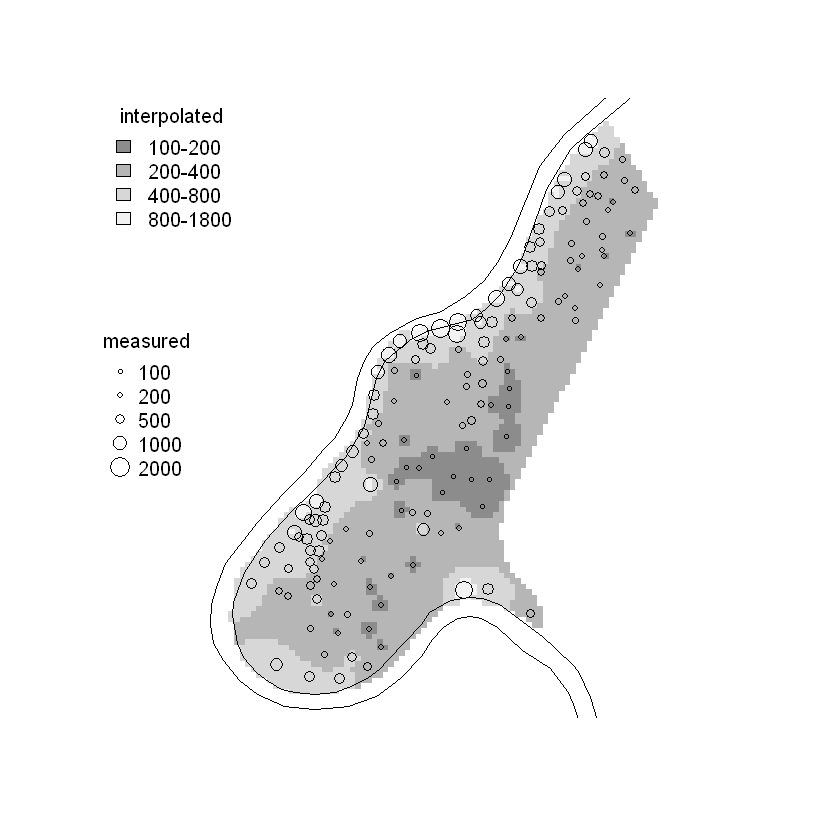

In [41]:
data(meuse.grid)
coordinates(meuse.grid) <- c("x", "y")
gridded(meuse.grid) <- TRUE
zn.idw <- krige(log(zinc) ~ 1, meuse, meuse.grid)

grays = gray.colors(4, 0.55, 0.95)
image(zn.idw, col = grays, breaks = log(c(100, 200, 400, 800, 1800)))
plot(meuse.sr, add = TRUE)
plot(meuse, pch = 1, cex = sqrt(meuse$zinc)/20, add = TRUE)
legVals <- c(100, 200, 500, 1000, 2000)
legend("left", legend = legVals, pch = 1, 
       pt.cex = sqrt(legVals)/20,
       bty = "n", title = "measured")
legend("topleft", legend = c("100-200", "200-400", "400-800", "800-1800"),
       fill = grays, bty = "n", title = "interpolated")

## 3.2 Trellis/Lattice Plots with spplot

- spplot 패키지는 Trellis graphics system 을 지원
- Trellis plots은 graphs 요소들을 합성을 쉽고 효율적으로 제공

### 3.2.1 A Straight Trellis Example

- meuse의 zinc변수에 log scale을 적용한것과 그렇지 않은 경우를 그림.
- lattice패키지의 levelplot()함수를 사용예와 spplot() 함수 사용예
- levelplot()함수을 사용법이 복잡하고,
- spplot() 함수는 많은 상세 내용을 숨기고 있음

In [4]:
library(gstat)
library(sp)
data(meuse)
coordinates(meuse) <- ~x+y
data(meuse.grid)
coordinates(meuse.grid) <- ~x+y
gridded(meuse.grid) <- T
zn <- krige(zinc~1,meuse,meuse.grid)
zn$direct <- zn$var1.pred
zn$log <- exp(krige(log(zinc)~1,meuse,meuse.grid)$var1.pred)

[inverse distance weighted interpolation]
[inverse distance weighted interpolation]


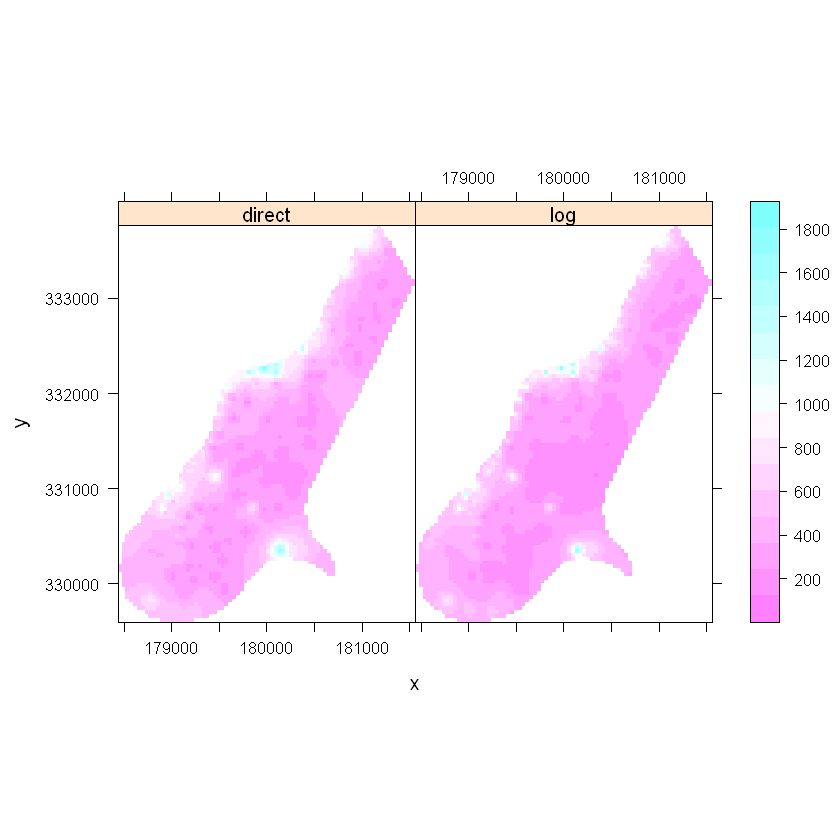

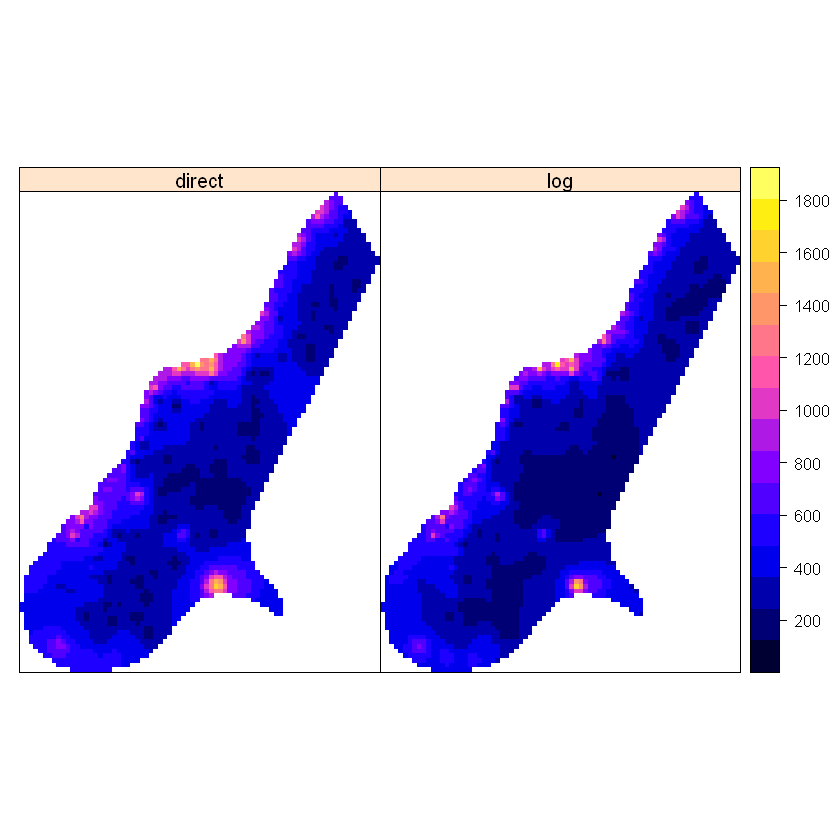

In [46]:
library(lattice)
levelplot(z ~ x + y | name, 
          spmap.to.lev(zn[c("direct", "log")]), asp = "iso")
spplot(zn[c("direct", "log")])

### 3.2.2 Plotting Points, Lines, Polygons, and Grids

- spplot()함수는 첫번째 인자로 point, line, polygon, grid을 가지고 있는  Spatial*DataFrame 객체임
- 두번째 인자는 attributes가 무엇인지를 나타내는 값들
- attributes들은 colours, symbols, legend classes, size, axes, and geographical reference items 으로 추가됨.
- 아래 예제는 contourLines()함수로 등고선을 계산함.

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


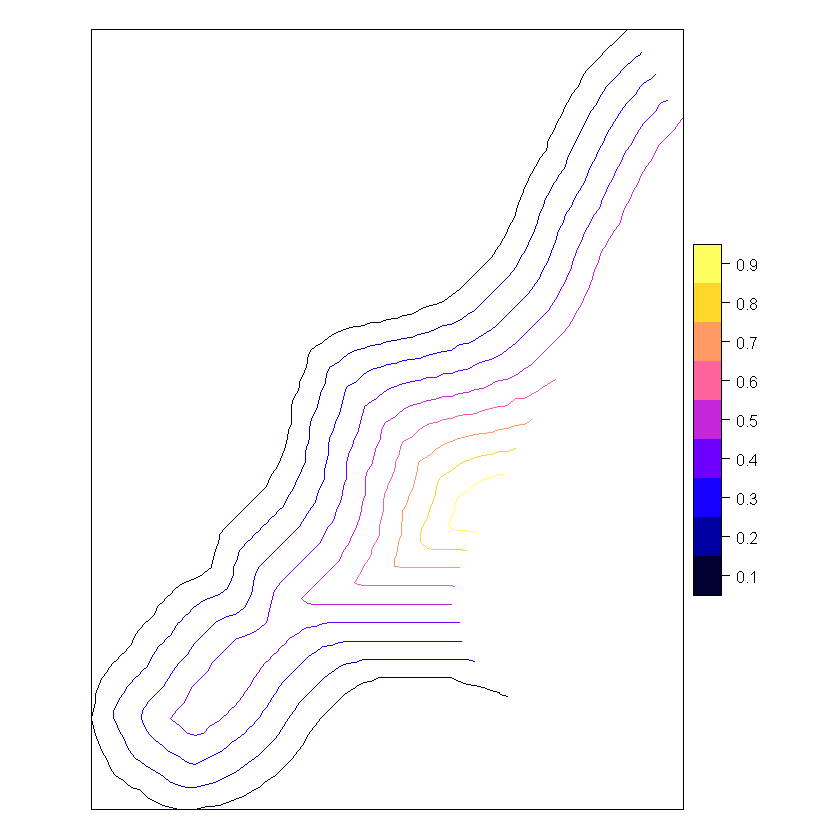

In [3]:
library(maptools)
data(meuse.grid)
coordinates(meuse.grid) <- c("x", "y")
meuse.grid <- as(meuse.grid, "SpatialPixelsDataFrame")
im <- as.image.SpatialGridDataFrame(meuse.grid["dist"])
cl <- ContourLines2SLDF(contourLines(im))
spplot(cl)

### 3.2.3 Adding Reference and Layout Elements to Plots

- spplot()함수는 sp.layout라는 인자를 가지고 있으며, lines, points, grids, polygons, text, or combinations의 annotate plots을 그려줌.
- sp.layout는 하나 이상의 layout정보를 포함.

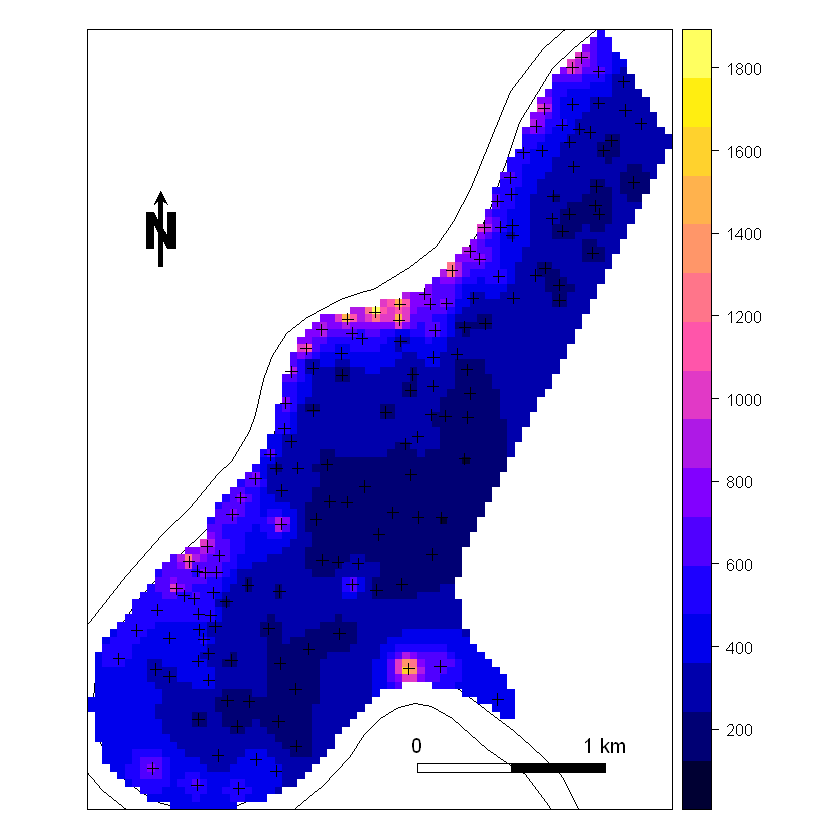

In [49]:
river <- list("sp.polygons", meuse.sr)
north <- list("SpatialPolygonsRescale", 
              layout.north.arrow(),
              offset = c(178750, 332500), scale = 400)
scale <- list("SpatialPolygonsRescale", 
              layout.scale.bar(),
              offset = c(180200, 329800), 
              scale = 1000, fill = c("transparent", "black"))
txt1 <- list("sp.text", c(180200, 329950), "0")
txt2 <- list("sp.text", c(181200, 329950), "1 km")
pts <- list("sp.points", meuse, pch = 3, col = "black")
meuse.layout <- list(river, north, scale, txt1, txt2, pts)
spplot(zn["log"], sp.layout = meuse.layout)

## 3.3 Interacting with Plots

- R에서는 interacting은 한계를 가지고 있고, 주로 마우스 클릭한 위치에 대한 정보를 표시함.

### 3.3.1 Interacting with Base Graphics

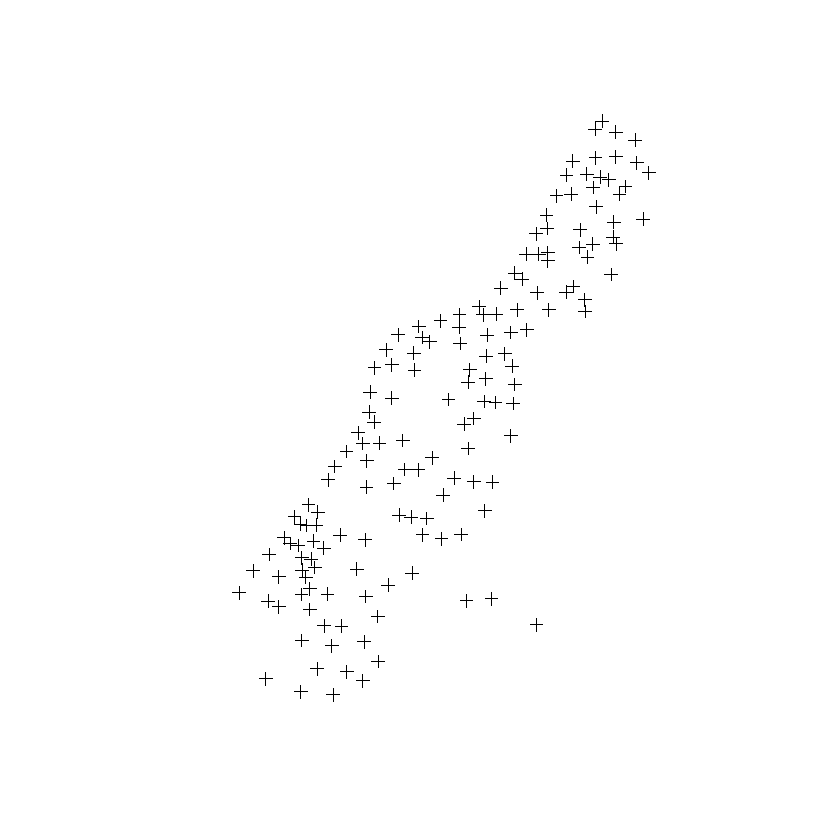

In [52]:
plot(meuse)
meuse.id <- identify(coordinates(meuse))

### 3.3.2 Interacting with spplot and Lattice Plots

In [54]:
ids <- spplot(meuse, "zinc", identify = TRUE)

In [ ]:
library(lattice)
trellis.focus("panel", column = 1, row = 1)
ids <- panel.identify()
trellis.unfocus()

## 3.4 Colour Palettes and Class Intervals

- R에서는 rainbow, grey.colors, heat.colors, terrain.colors, topo.colors, and cm.colors 의 colour palettes을 지원함.
- cm.colors은 spplot에서의 기본 palette임
- colorRampPalette()함수로 Palettes을 만들 수 있음.

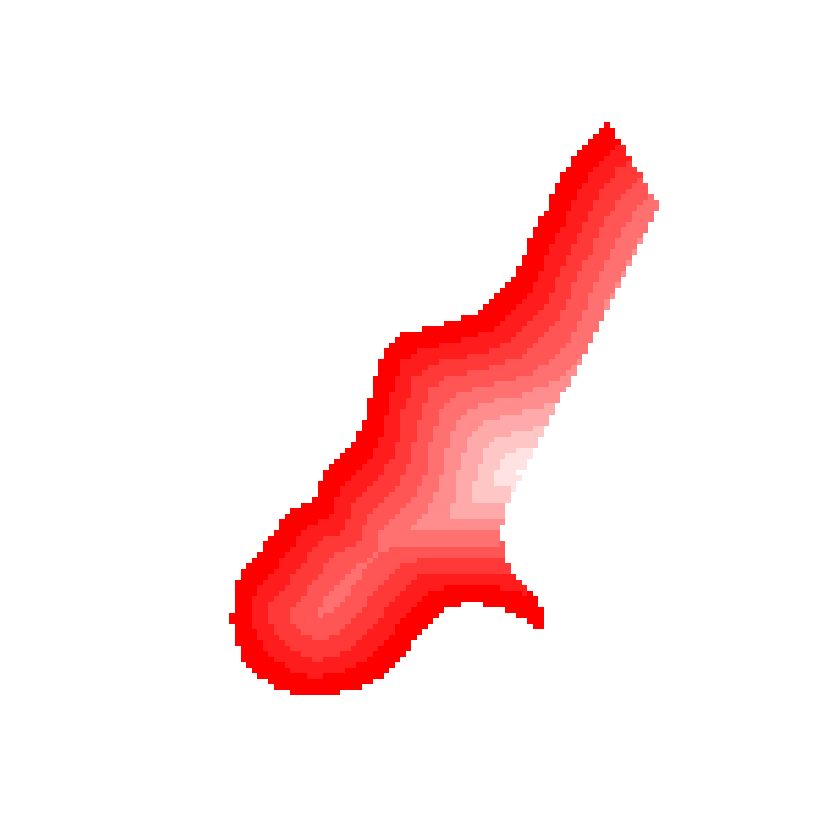

In [57]:
rw.colors <- colorRampPalette(c("red", "white"))
image(meuse.grid["dist"], col = rw.colors(10))

- RColorBrewer패키지에서 다양한 palettes을 제공함.


brwr.p> ## create a sequential palette for usage and show colors
brwr.p> mypalette<-brewer.pal(7,"Greens")

brwr.p> image(1:7,1,as.matrix(1:7),col=mypalette,xlab="Greens (sequential)",
brwr.p+        ylab="",xaxt="n",yaxt="n",bty="n")

brwr.p> ## display a divergent palette
brwr.p> display.brewer.pal(7,"BrBG")


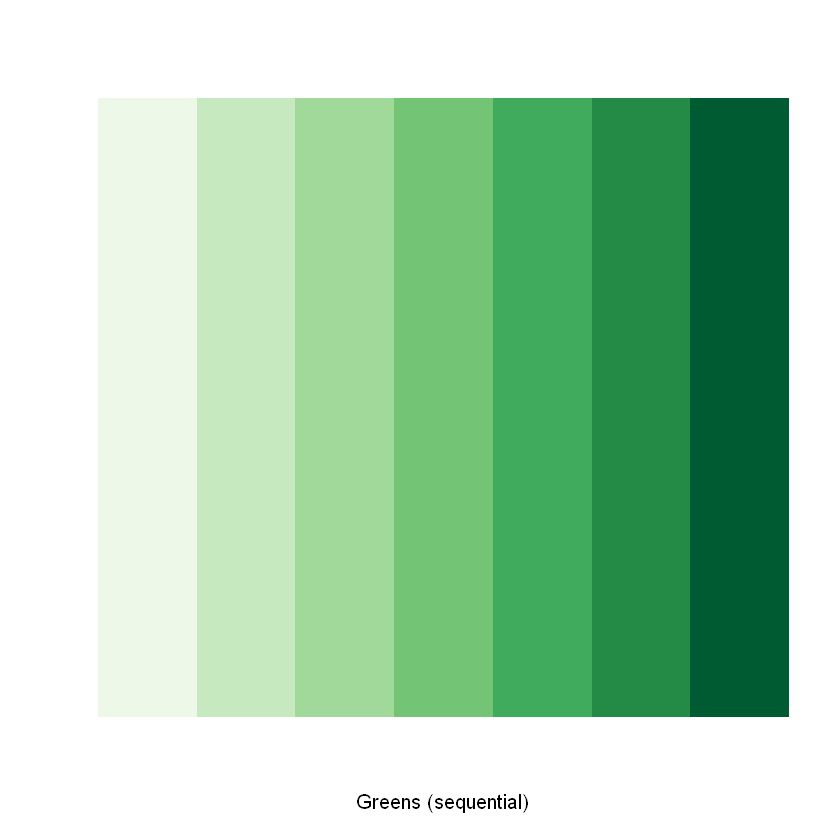


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> ## display a qualitative palette
brwr.p> display.brewer.pal(7,"Accent")


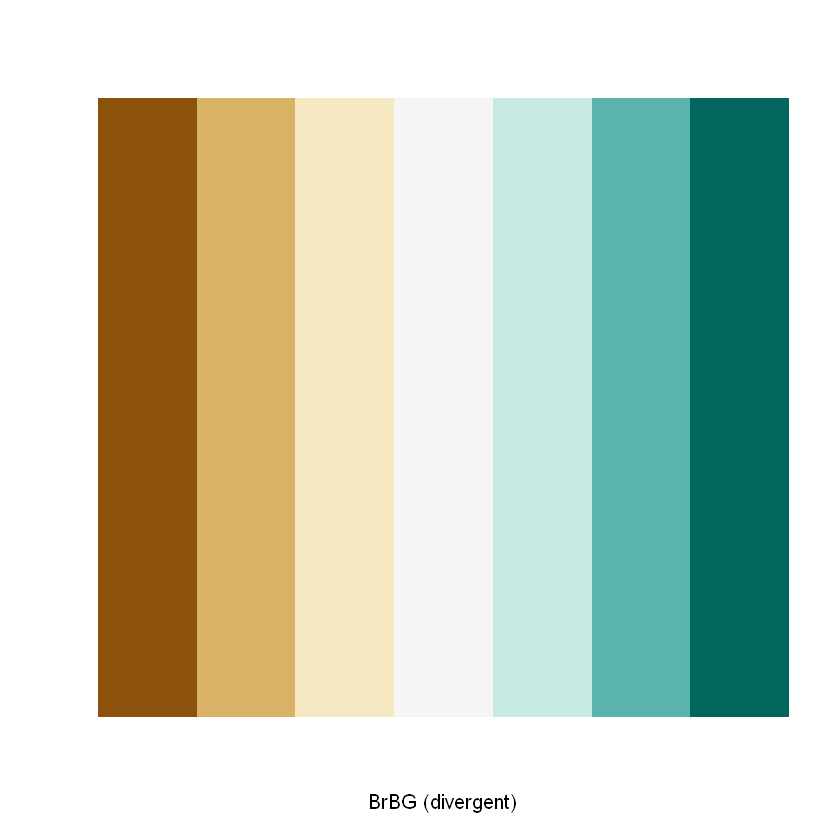


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> ## display a palettes simultanoeusly
brwr.p> display.brewer.all(n=10, exact.n=FALSE)


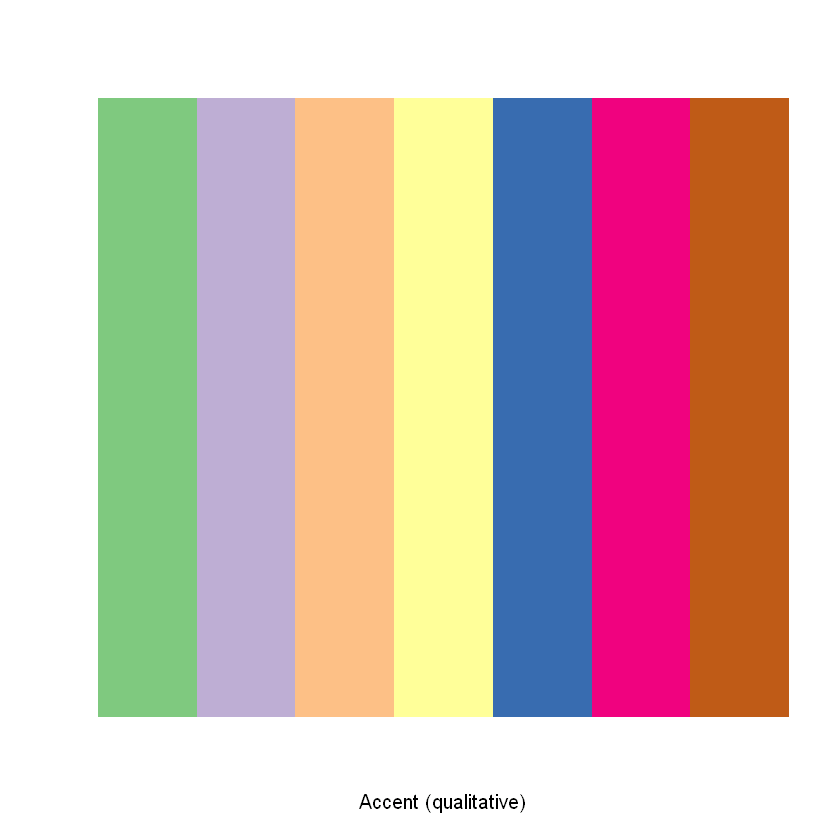


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(n=10)


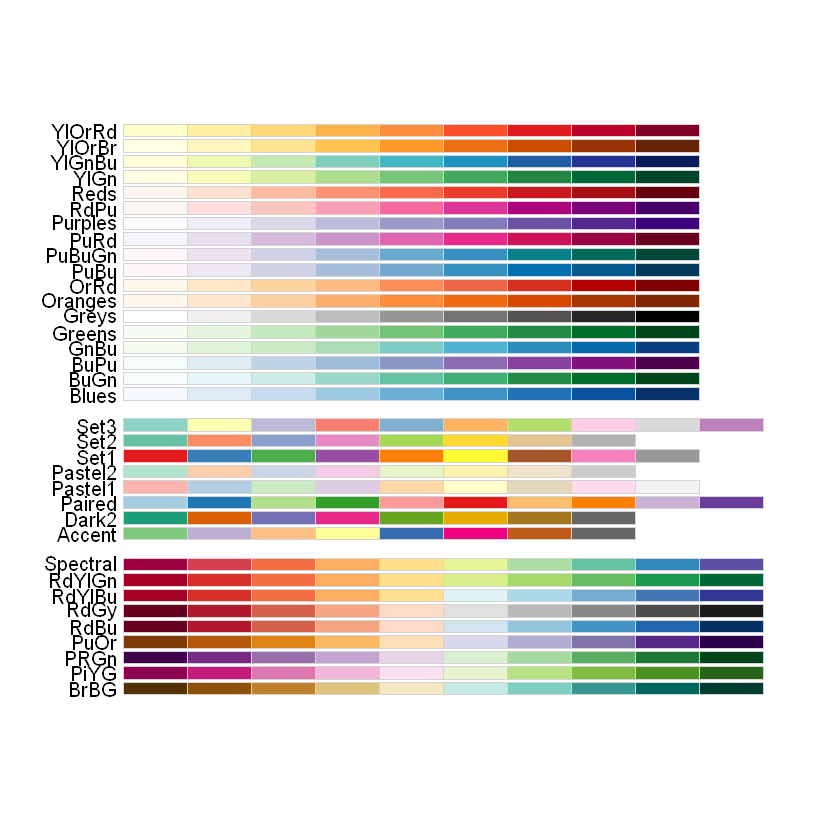


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all()


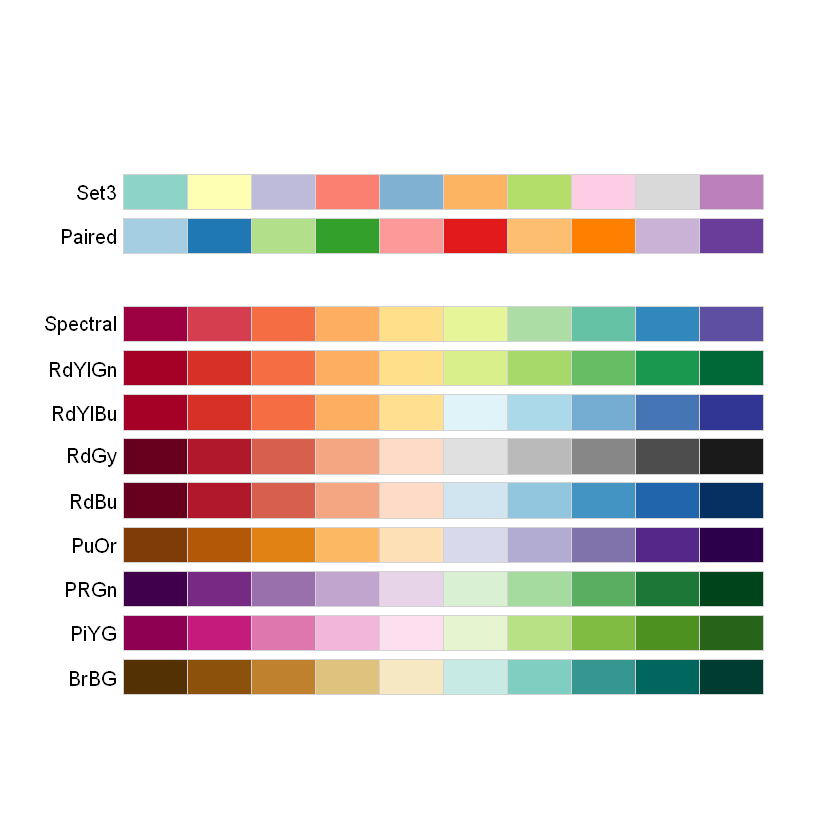


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(type="div")


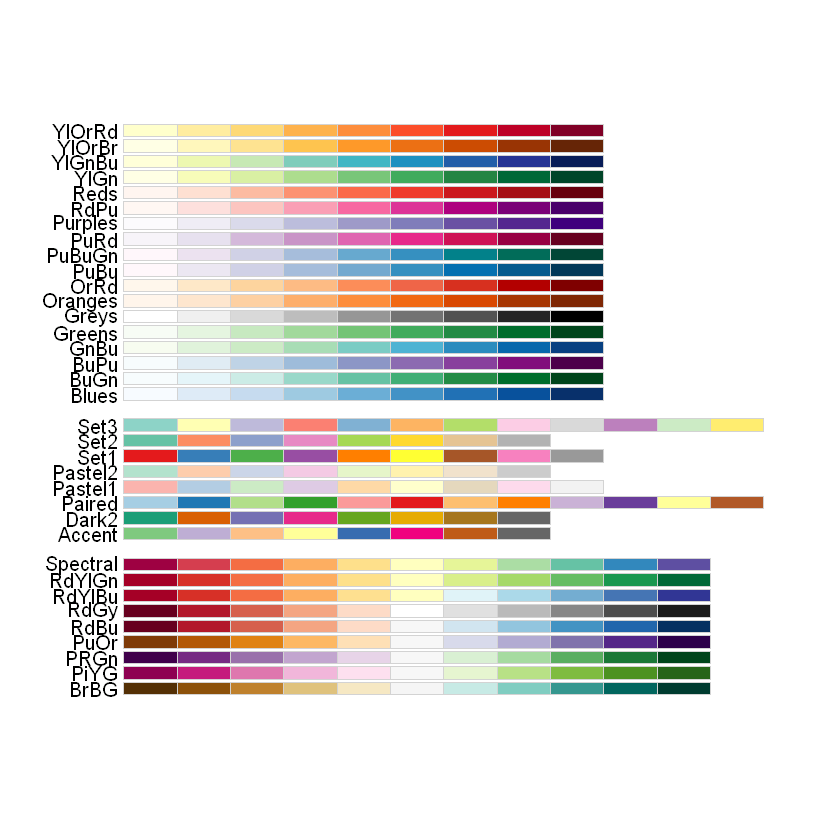


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(type="seq")


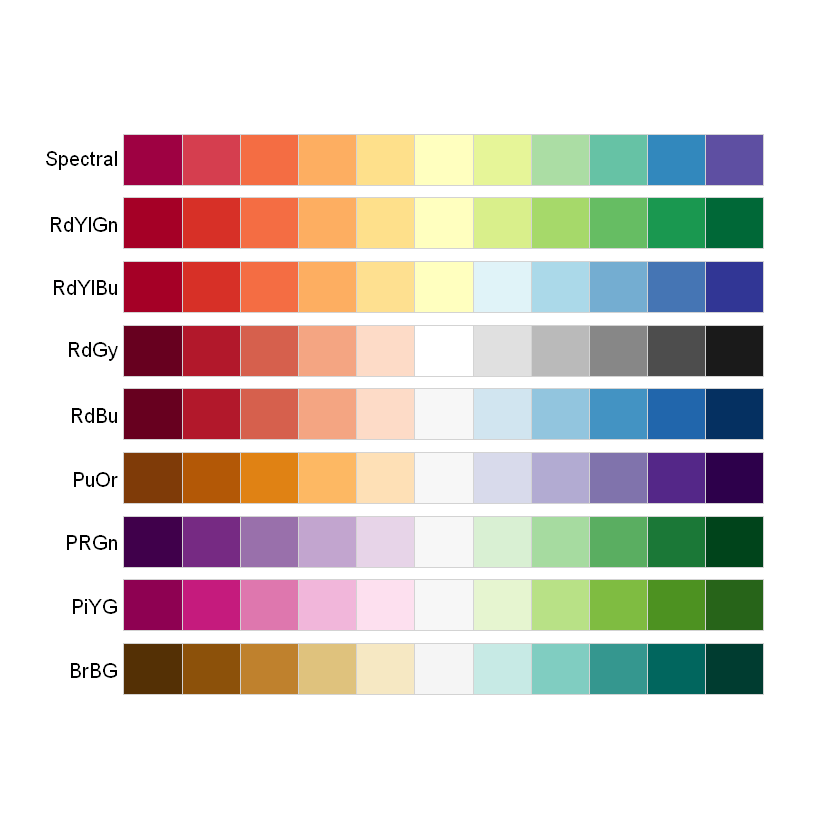


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(type="qual") 


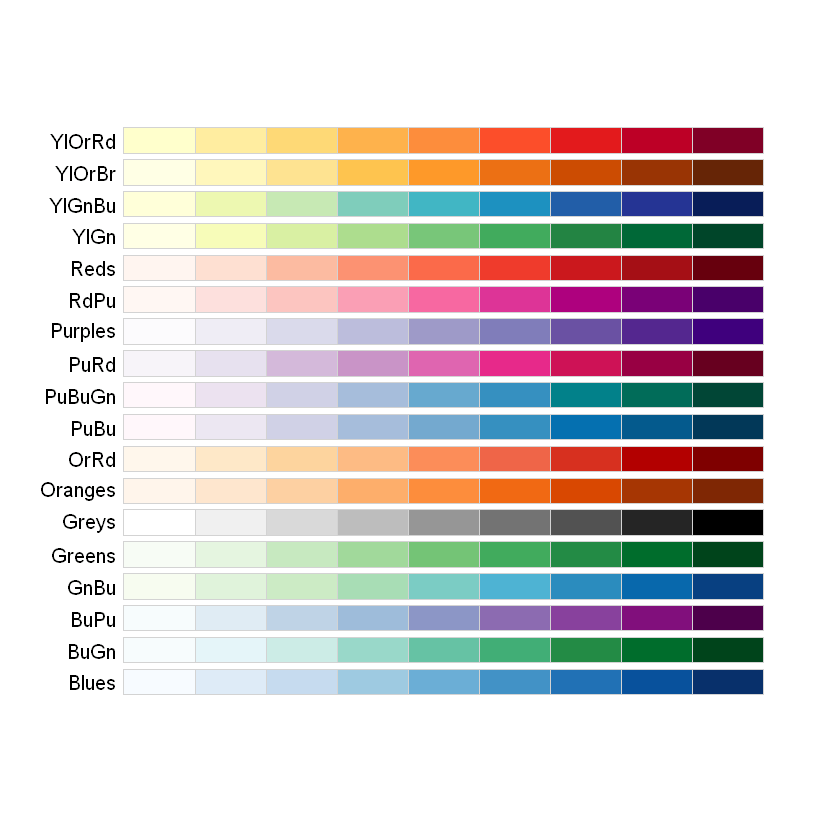


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(n=5,type="div",exact.n=TRUE)


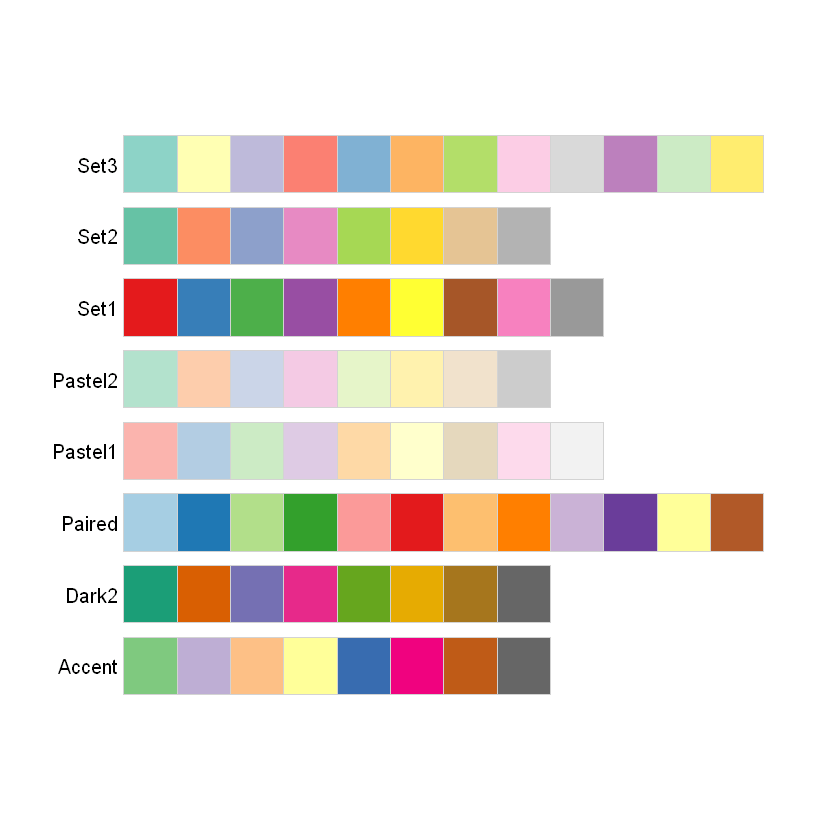


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> display.brewer.all(colorblindFriendly=TRUE)


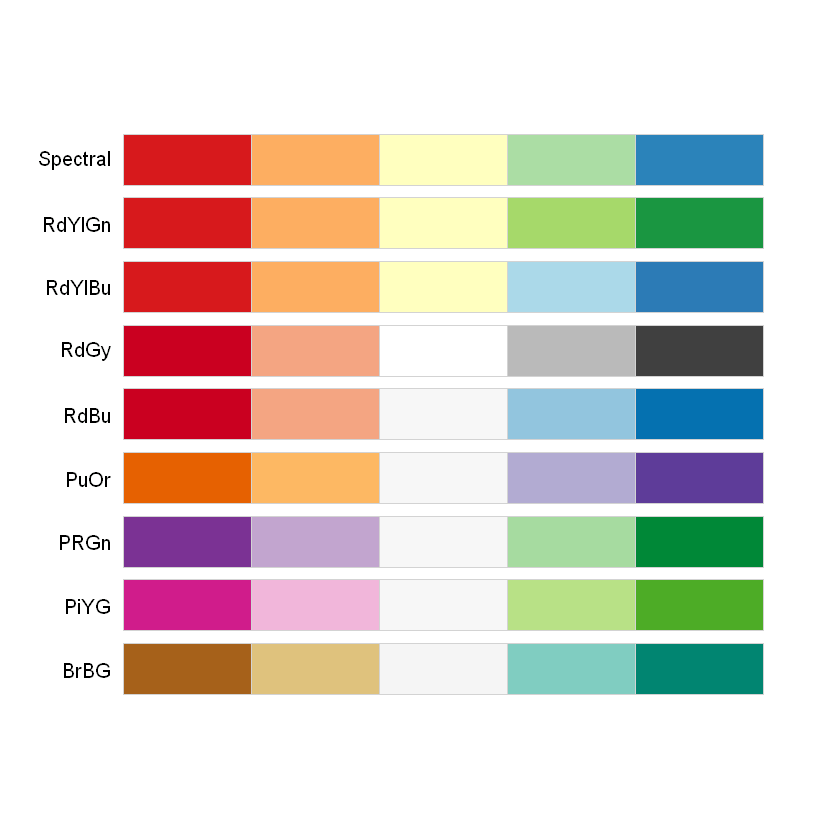


brwr.p> devAskNewPage(ask=TRUE)

brwr.p> brewer.pal.info
         maxcolors category colorblind
BrBG            11      div       TRUE
PiYG            11      div       TRUE
PRGn            11      div       TRUE
PuOr            11      div       TRUE
RdBu            11      div       TRUE
RdGy            11      div      FALSE
RdYlBu          11      div       TRUE
RdYlGn          11      div      FALSE
Spectral        11      div      FALSE
Accent           8     qual      FALSE
Dark2            8     qual       TRUE
Paired          12     qual       TRUE
Pastel1          9     qual      FALSE
Pastel2          8     qual      FALSE
Set1             9     qual      FALSE
Set2             8     qual       TRUE
Set3            12     qual      FALSE
Blues            9      seq       TRUE
BuGn             9      seq       TRUE
BuPu             9      seq       TRUE
GnBu             9      seq       TRUE
Greens           9      seq       TRUE
Greys            9      seq       TRUE
Orange

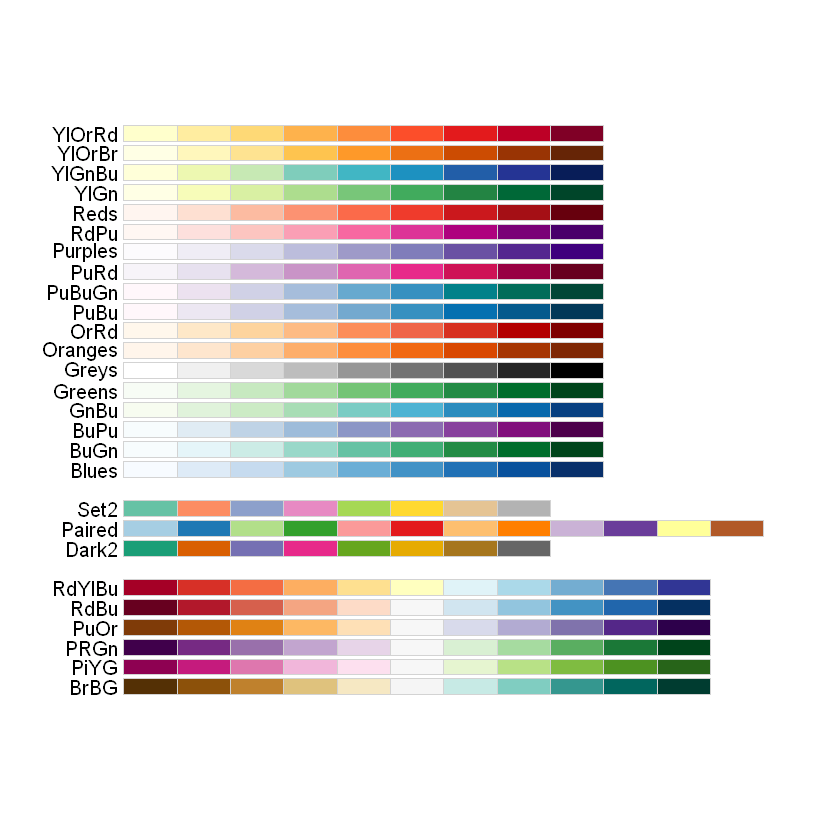

In [59]:
library(RColorBrewer)
example(brewer.pal)

### 3.4.2 Class Intervals

- 색상의 수와 데이터의 간격을 어떻게 맞출것인가??
- 우리는 클래스의 수는 6개로 제한함.
- classInt 패키지에서 편리한 기능을 제공함.
- 아래 예제는 quantile로 5등분한 데이터의 간격을 보여줌.

In [61]:
install.packages("classInt", repos="http://cran.nexr.com/"  ) 

also installing the dependency 'e1071'



package 'e1071' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpc7RxKo\downloaded_packages


In [7]:
library(RColorBrewer)
library(classInt)
pal <- grey.colors(4, 0.95, 0.55, 2.2)
q5 <- classIntervals(meuse$zinc, n = 5, style = "quantile")
q5

style: quantile
  one of 14,891,626 possible partitions of this variable into 5 classes
  [113,186.8) [186.8,246.4) [246.4,439.6) [439.6,737.2)  [737.2,1839] 
           31            31            31            31            31 

In [64]:
diff(q5$brks)

[1]   73.8   59.6  193.2  297.6 1101.8

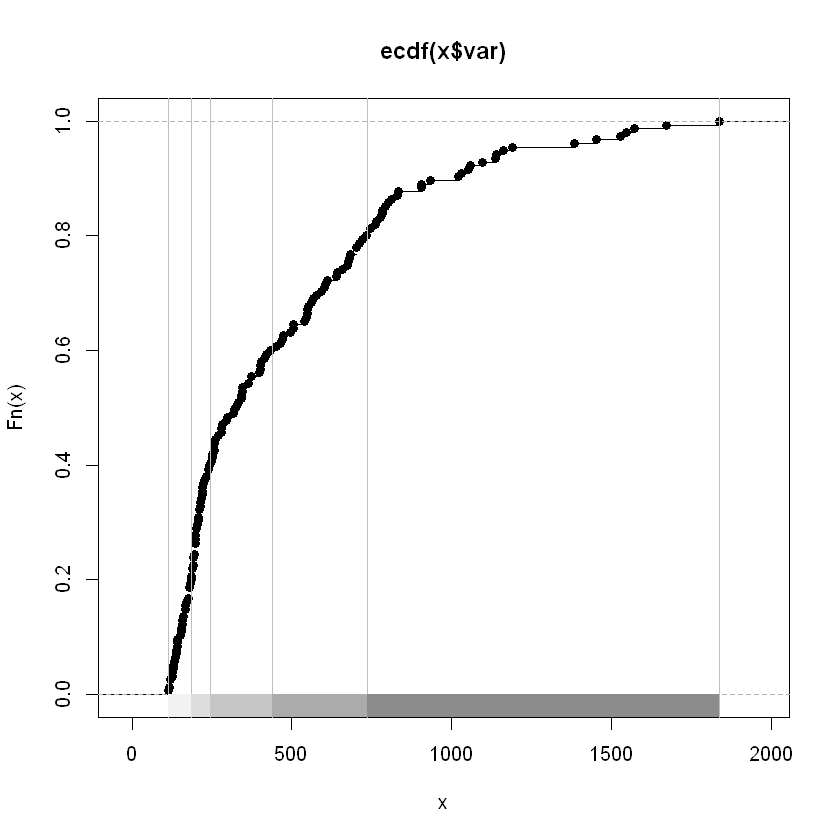

In [65]:
plot(q5, pal = pal)

- 위의 그림을 보면 quantiles을 사용하는 것은 좋은 방법이 아님.
- diff()함수로 확인한 간격이 균일하지 않음.

- 좀더 자연스럽게 분류하기 위해서 "Fisher-Jenks classification"을 이용함.
- 참조 : https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization

style: fisher
  one of 14,891,626 possible partitions of this variable into 5 classes
   [113,307.5)    [307.5,573)    [573,869.5) [869.5,1286.5)  [1286.5,1839] 
            75             32             29             12              7 

[1] 194.5 265.5 296.5 417.0 552.5

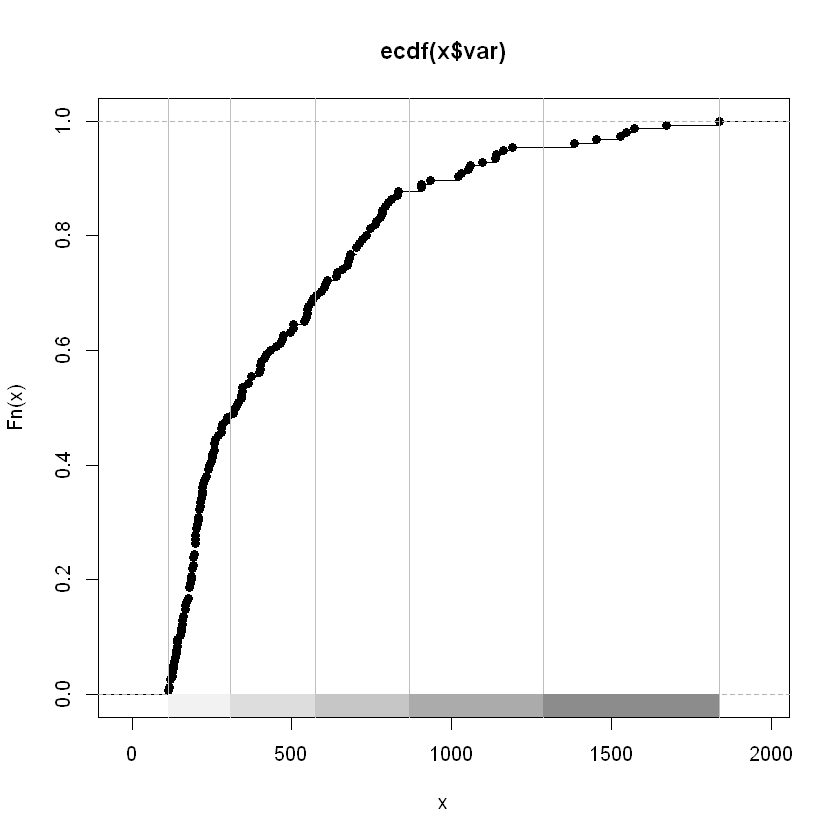

In [5]:
fj5 <- classIntervals(meuse$zinc, n = 5, style = "fisher")
fj5
diff(fj5$brks)
plot(fj5, pal = pal)

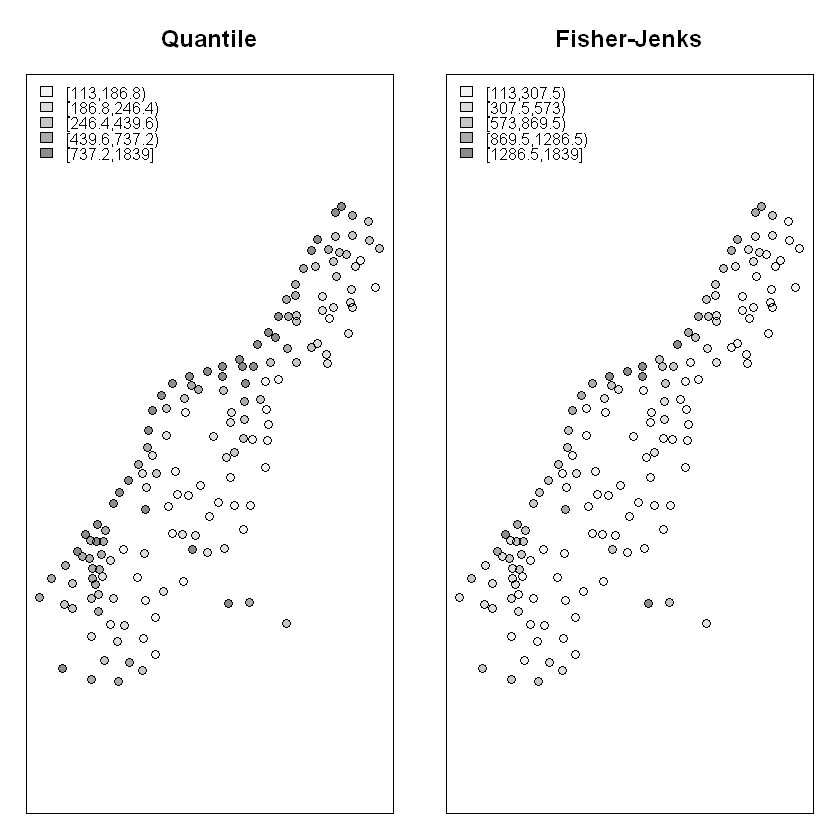

In [10]:
oopar <- par(mar=c(1,1,3,1)+0.1, mfrow=c(1,2))
q5Colours <- findColours(q5, pal)
plot(meuse, col=q5Colours, pch=19)
points(meuse, pch=1)
box()
title(main="Quantile")
legend("topleft", fill=attr(q5Colours, "palette"), legend=names(attr(q5Colours,
  "table")), bty="n", cex=0.8, y.intersp=0.8)


fj5Colours <- findColours(fj5, pal)
plot(meuse, col=fj5Colours, pch=19)
points(meuse, pch=1)
box()
title(main="Fisher-Jenks")
legend("topleft", fill=attr(fj5Colours, "palette"),
 legend=names(attr(fj5Colours, "table")), bty="n", cex=0.8, y.intersp=0.8)
par(oopar)

![](chapter03_01.png)